RFBOutputContext()

GraphicsLayoutWidget(css_height='480px', css_width='800px')
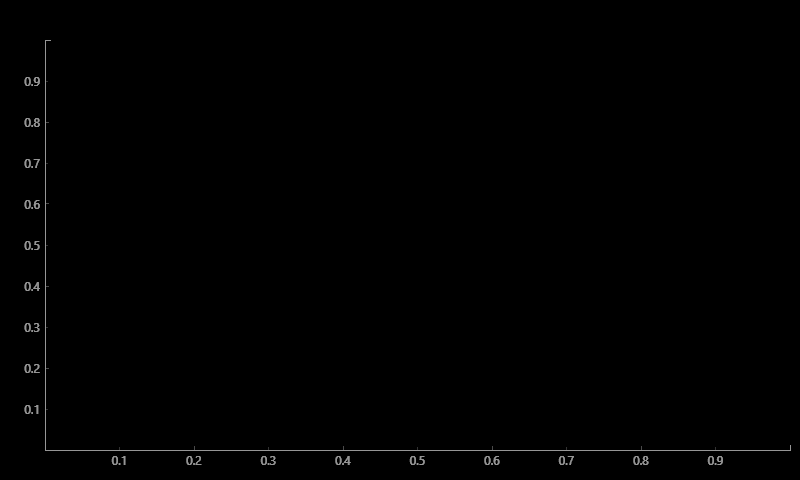

In [7]:


"""
Demonstrates common image analysis tools.

Many of the features demonstrated here are already provided by the ImageView
widget, but here we present a lower-level approach that provides finer control
over the user interface.
"""

from pyqtgraph.jupyter import GraphicsLayoutWidget
import ipywidgets
from IPython.display import display

import pyqtgraph as pg
import numpy as np

import pyTEMlib.file_tools as ft
def type_of_script():
    try:
        ipy_str = str(type(get_ipython()))
        if 'zmqshell' in ipy_str:
            return 'jupyter'
        if 'terminal' in ipy_str:
            return 'ipython'
    except:
        return 'terminal'

def get_plot(plot_jupyter=None):
    
    if plot_jupyter is None:
        plot_jupyter = False
        if type_of_script() == 'jupyter':
            plot_jupyter = True
        
    if plot_jupyter:
        pg.mkQApp()
        widget = GraphicsLayoutWidget(css_width="800px", css_height="480px")

        # A plot area (ViewBox + axes) for displaying the image
        win = widget.addPlot(title="")
        display(widget)

    else:
        win = pg.plot()
        win.setWindowTitle('pyqtgraph example: Plot data selection')

    return win

def plot(win, dataset, num=0):
    energy_scale = np.hstack((dataset.energy_loss.values, [dataset.energy_loss[0]]))
    spectrum = pg.PlotCurveItem(x=energy_scale, y=np.array(dataset)[0,num,], stepMode=True, fillLevel=0, padding = 0, pen='b', clickable=True)

    win.addItem(spectrum)

    return win


datasets = ft.open_file()
win = get_plot()
plot(win, datasets['Channel_000'])
plot(win, datasets['Channel_000'], 5)

if __name__ == '__main__' and isinstance(win, pg.widgets.PlotWidget.PlotWidget):
    pg.exec()

In [2]:
win

In [4]:
win